# Penjelasan Kode Persamaan Burgers 1D
Kode ini menyelesaikan persamaan Burgers 1D menggunakan metode beda hingga (Finite Difference Method).

## Tahapan Kode:
1. **Import Library**: Mengimpor pustaka yang diperlukan seperti `numpy`, `sympy`, dan `matplotlib`.
2. **Inisialisasi Variabel**: Mendefinisikan variabel simbolik dan parameter grid.
3. **Persamaan Awal (Initial Condition)**: Menggunakan fungsi `sympy` untuk mendefinisikan kondisi awal persamaan.
4. **Solusi Analitik**: Menghitung solusi analitik menggunakan fungsi `lambdify`.
5. **Solusi Numerik**: Menggunakan skema beda hingga untuk menghitung solusi numerik.
6. **Visualisasi**: Memplot solusi awal, analitik, dan numerik menggunakan `matplotlib`.

## Output Kode:
- **Solusi Awal**: Grafik kondisi awal kecepatan.
- **Solusi Analitik**: Grafik solusi analitik berdasarkan persamaan Burgers.
- **Solusi Numerik**: Grafik solusi numerik menggunakan metode beda hingga.
- **Perbandingan Solusi**: Grafik yang membandingkan solusi awal, analitik, dan numerik.

Solving 1D Burgers Equation using Finite Difference Method
Convection Term: Backward Difference Scheme
Diffusion Term: Central Difference Scheme

------------------------------------------------
printing phi expression
------------------------------------------------
exp(-(-4*t + x - 2*pi)**2/(4*nu*(t + 1))) + exp(-(-4*t + x)**2/(4*nu*(t + 1)))
------------------------------------------------
Initial Condition expression
------------------------------------------------
-2*nu*(-(-8*t + 2*x)*exp(-(-4*t + x)**2/(4*nu*(t + 1)))/(4*nu*(t + 1)) - (-8*t + 2*x - 4*pi)*exp(-(-4*t + x - 2*pi)**2/(4*nu*(t + 1)))/(4*nu*(t + 1)))/(exp(-(-4*t + x - 2*pi)**2/(4*nu*(t + 1))) + exp(-(-4*t + x)**2/(4*nu*(t + 1)))) + 4
------------------------------------------------
Computing Innitial Solution
------------------------------------------------
[4.         4.06283185 4.12566371 4.18849556 4.25132741 4.31415927
 4.37699112 4.43982297 4.50265482 4.56548668 4.62831853 4.69115038
 4.75398224 4.81681409 4.87964

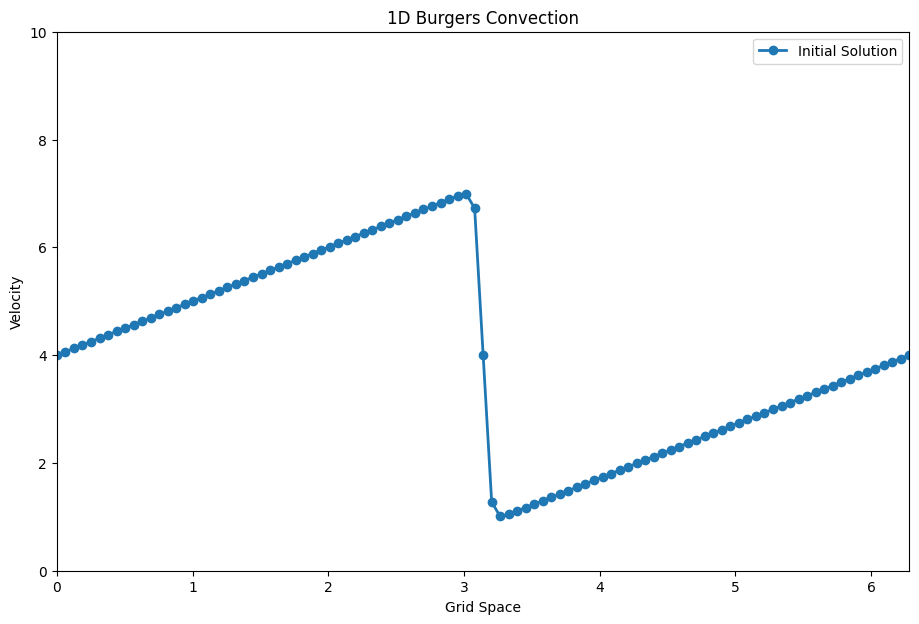

------------------------------------------------
Computing Analytical Solution
------------------------------------------------
------------------------------------------------
Printing Analytical Solution
------------------------------------------------
[3.67659023 3.73434198 3.79209372 3.84984546 3.90759721 3.96534895
 4.0231007  4.08085244 4.13860419 4.19635593 4.25410767 4.31185942
 4.36961116 4.42736291 4.48511465 4.5428664  4.60061814 4.65836989
 4.71612163 4.77387337 4.83162512 4.88937686 4.94712861 5.00488035
 5.0626321  5.12038384 5.17813558 5.23588733 5.29363907 5.35139082
 5.40914256 5.46689431 5.52464605 5.58239779 5.64014954 5.69790128
 5.75565303 5.81340477 5.87115652 5.92890826 5.98666    6.04441175
 6.10216349 6.15991524 6.21766698 6.27541873 6.33317047 6.39092221
 6.44867394 6.50642549 6.56417458 6.62189086 6.67916901 6.73060339
 6.70529246 5.84605874 2.64731692 1.34264158 1.26247621 1.30962834
 1.36658484 1.42427702 1.48202431 1.53977572 1.59752744 1.65527918
 1.71303

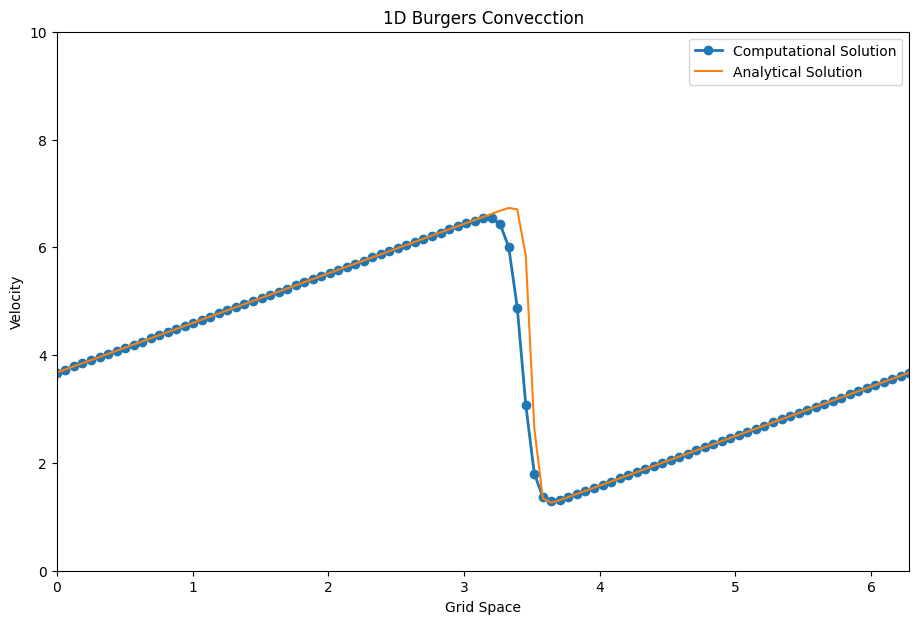

In [7]:
import numpy  #give mathamatical or matrix expressions
import sympy  #SymPy is the symbolic math library for Python. 

from sympy import init_printing       
init_printing(use_latex = True) #Output Rendering using LATEX.

lineSingle = '------------------------------------------------'

print("Solving 1D Burgers Equation using Finite Difference Method")
print("Convection Term: Backward Difference Scheme")
print("Diffusion Term: Central Difference Scheme\n")

#setting up symbolic variables for the three variables in our initial condition then type full eqn of phi

#innitial condition

x, nu, t = sympy.symbols('x nu t')
phi      = (sympy.exp(-(x - 4*t)**2/(4*nu*(t + 1))) + sympy.exp(-(x - 4*t - 2*sympy.pi)**2/(4*nu*(t+1))))       #phi expression

print(lineSingle)
print("printing phi expression")
print(lineSingle)
print(phi)


phiprime = phi.diff(x)        #differentiation wrt x
phiprime

from sympy.utilities.lambdify import lambdify       #translate sympy symbolic initial condition equation into a usable Python expression.

u = -2*nu*(phiprime/phi) + 4                        #Initial condition expression

print(lineSingle)
print("Initial Condition expression")
print(lineSingle)
print(u)

ufunc = lambdify((t, x, nu), u)    #putting value of t, x and nu in u and getting the output


from matplotlib import pyplot     

#seting up the grid

nx = 101                                #grid points
nt =  20                                #number of timesteps
dx =  2 * numpy.pi / (nx - 1)           #grid spacing
nu = .07                                #viscosity
dt = dx * nu                            #timestep size

x  = numpy.linspace(0, 2 * numpy.pi, nx)
un = numpy.empty(nx)
t  = 0                                  #initial time t = 0

u  = numpy.asarray([ufunc(t, x0, nu) for x0 in x])        #initial condition plot using our lambdify-ed function

print(lineSingle)
print("Computing Innitial Solution")
print(lineSingle)
print(u)

print(lineSingle)
print("Plotting Innitial Solution")
print(lineSingle)

pyplot.figure(figsize=(11, 7), dpi=100)
pyplot.plot(x, u, marker='o', lw=2, label='Initial Solution')
pyplot.title('1D Burgers Convection')
pyplot.xlabel('Grid Space')
pyplot.ylabel('Velocity')
pyplot.xlim([0, 2 * numpy.pi])
pyplot.ylim([0, 10]);

pyplot.legend();
pyplot.show()

print(lineSingle)
print("Computing Analytical Solution")
print(lineSingle)

u_analytical = numpy.asarray([ufunc(nt * dt, xi, nu) for xi in x])            #computing analytical solution

print(lineSingle)
print("Printing Analytical Solution")
print(lineSingle)

print(u_analytical)

print(lineSingle)
print("Calculating Numerical Solution......")
print(lineSingle)

for n in range(nt):                 #time marching
    un = u.copy()                   
    for i in range(1, nx - 1):      #space marching

        #Backward Difference for Convection Term
        #Central Difference for Diffusion Term
        
        u[i] = un[i] - un[i]*dt/dx*(un[i] - un[i-1]) + nu*dt/dx**2*(un[i+1]-2*un[i]+un[i-1])

        #periodic boudnary condition
        
        u[0] = un[0] - un[0]*dt/dx*(un[0] - un[-2]) + nu*dt/dx**2*(un[1]-2*un[0]+un[-2])
        u[-1] = u[0]
        
print(lineSingle)
print("Printing Numerical Solution......")
print(lineSingle)

print(u)


print(lineSingle)
print("Plotting Innitial, Analytical & Numerical Solution")
print(lineSingle)

pyplot.figure(figsize=(11,7), dpi=100)

pyplot.plot(x,u, marker = 'o', lw = 2, label='Computational Solution')
pyplot.plot(x, u_analytical, label = 'Analytical Solution')
pyplot.xlim([0, 2*numpy.pi])
pyplot.ylim([0, 10])

pyplot.title('1D Burgers Convecction')
pyplot.xlabel('Grid Space')
pyplot.ylabel('Velocity')

pyplot.legend();
pyplot.show()

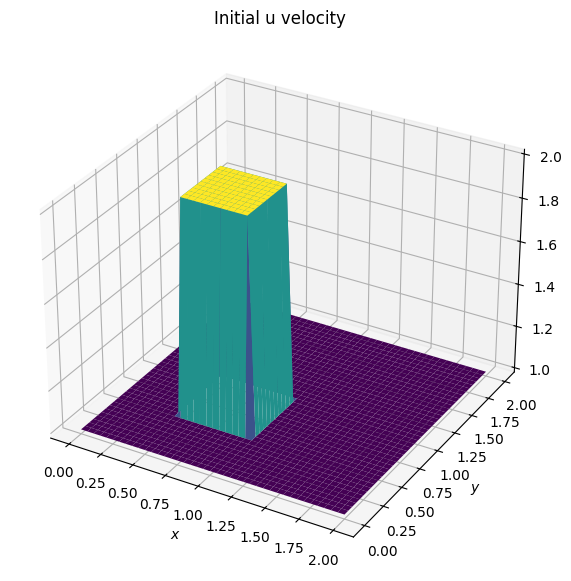

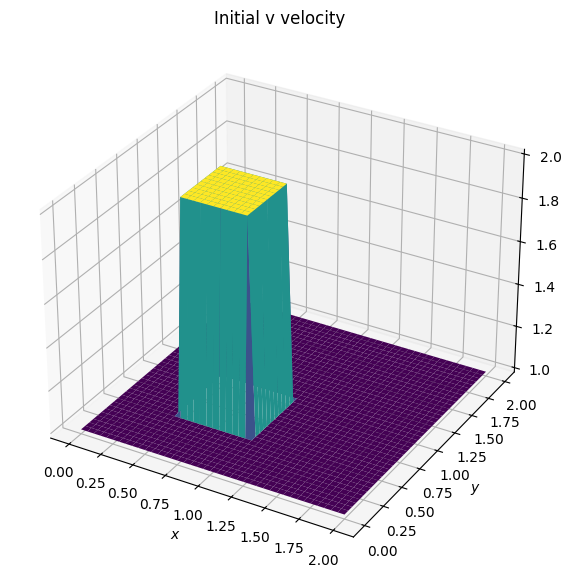

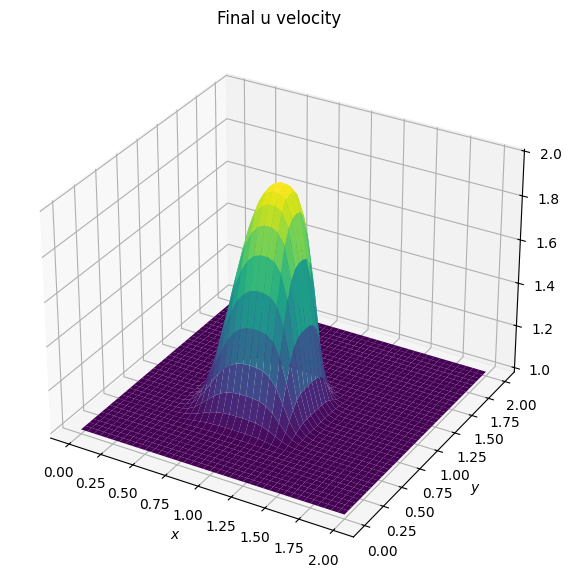

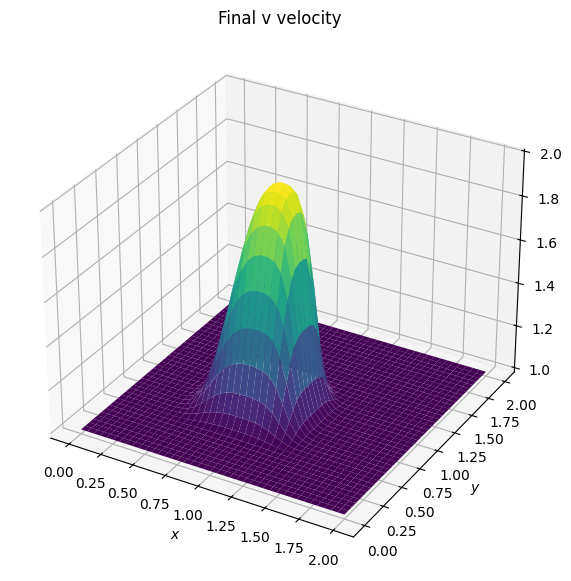

: 

In [ ]:
import numpy as np
from matplotlib import pyplot as plt, cm
from mpl_toolkits.mplot3d import Axes3D

# Variable declarations
nx = 41
ny = 41
nt = 12
c = 1
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
nu = 0.01
sigma = 0.2
dt = sigma * dx

x = np.linspace(0, 2, nx)
y = np.linspace(0, 2, ny)

u = np.ones((nx, ny))
v = np.ones((nx, ny))

un = np.ones((nx, ny))
vn = np.ones((nx, ny))

# Initial conditions
u[int(0.5/dx):int(1/dx+1), int(0.5/dy):int(1/dy+1)] = 2
v[int(0.5/dx):int(1/dy+1), int(0.5/dy):int(1/dy+1)] = 2

fig = plt.figure(figsize=(11, 7), dpi=100)
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(x, y)
surf = ax.plot_surface(X, Y, u, cmap=cm.viridis)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
plt.title('Initial u velocity')
plt.show()

fig = plt.figure(figsize=(11, 7), dpi=100)
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(x, y)
surf = ax.plot_surface(X, Y, v, cmap=cm.viridis)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
plt.title('Initial v velocity')
plt.show()

for n in range(nt):
    un = u.copy()
    vn = v.copy()
    u[1:-1, 1:-1] = (un[1:-1, 1:-1] -
                     dt / dx * un[1:-1, 1:-1] * (un[1:-1, 1:-1] - un[0:-2, 1:-1]) -
                     dt / dy * vn[1:-1, 1:-1] * (un[1:-1, 1:-1] - un[1:-1, 0:-2]) +
                     nu * dt / dx**2 * (un[2:, 1:-1] - 2 * un[1:-1, 1:-1] + un[:-2, 1:-1]) +
                     nu * dt / dy**2 * (un[1:-1, 2:] - 2 * un[1:-1, 1:-1] + un[1:-1, :-2]))

    v[1:-1, 1:-1] = (vn[1:-1, 1:-1] -
                     dt / dx * un[1:-1, 1:-1] * (vn[1:-1, 1:-1] - vn[0:-2, 1:-1]) -
                     dt / dy * vn[1:-1, 1:-1] * (vn[1:-1, 1:-1] - vn[1:-1, 0:-2]) +
                     nu * dt / dx**2 * (vn[2:, 1:-1] - 2 * vn[1:-1, 1:-1] + vn[:-2, 1:-1]) +
                     nu * dt / dy**2 * (vn[1:-1, 2:] - 2 * vn[1:-1, 1:-1] + vn[1:-1, :-2]))

fig = plt.figure(figsize=(11, 7), dpi=100)
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(x, y)
surf = ax.plot_surface(X, Y, u, cmap=cm.viridis)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
plt.title('Final u velocity')
plt.show()

fig = plt.figure(figsize=(11, 7), dpi=100)
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(x, y)
surf = ax.plot_surface(X, Y, v, cmap=cm.viridis)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
plt.title('Final v velocity')
plt.show()

MovieWriter ffmpeg unavailable; using Pillow instead.


ValueError: unknown file extension: .mp4

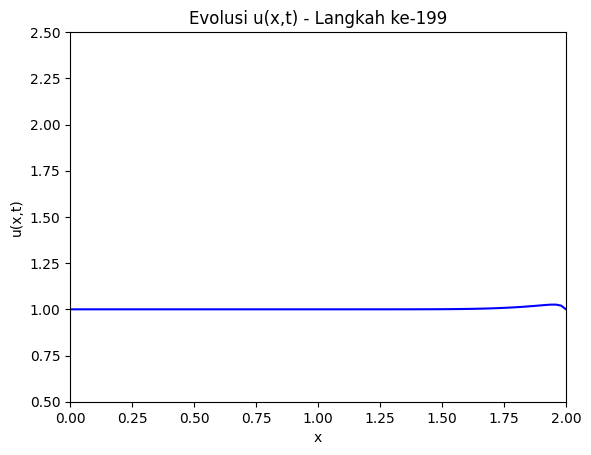

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# === PARAMETER ===
nx = 101           # Jumlah grid x
L = 2.0            # Panjang domain
dx = L / (nx - 1)  # Jarak antar grid
nu = 0.01          # Viskositas (rendah = gelombang kejut lebih tajam)
sigma = 0.2        # CFL number
dt = sigma * dx**2 / nu  # Langkah waktu
nt = 200           # Jumlah langkah waktu total

# === GRID ===
x = np.linspace(0, L, nx)

# === KONDISI AWAL: Step function (lalu lintas / shockwave)
u = np.ones(nx)
u[int(0.5/dx):int(1/dx+1)] = 2  # Macet di antara 0.5 sampai 1.0

# === SIAPKAN FIGURE UNTUK ANIMASI ===
fig, ax = plt.subplots()
line, = ax.plot(x, u, color='blue')
ax.set_xlim(0, L)
ax.set_ylim(0.5, 2.5)
ax.set_xlabel('x')
ax.set_ylabel('u(x,t)')
ax.set_title('Evolusi u(x,t) pada Persamaan Burgers')

# === FUNGSI UPDATE ANIMASI ===
def animate(n):
    global u
    un = u.copy()
    for i in range(1, nx-1):
        u[i] = (un[i]
                - un[i] * dt/dx * (un[i] - un[i-1])
                + nu * dt/dx**2 * (un[i+1] - 2*un[i] + un[i-1]))
    line.set_ydata(u)
    ax.set_title(f'Evolusi u(x,t) - Langkah ke-{n}')
    return line,

# === BUAT ANIMASI ===
ani = animation.FuncAnimation(fig, animate, frames=nt, interval=30, blit=True)
ani.save('burgers_animation.mp4', writer='ffmpeg')
plt.close(fig)  # Tutup figure setelah menyimpan animasi
# === TAMPILKAN ANIMASI ===
plt.show()


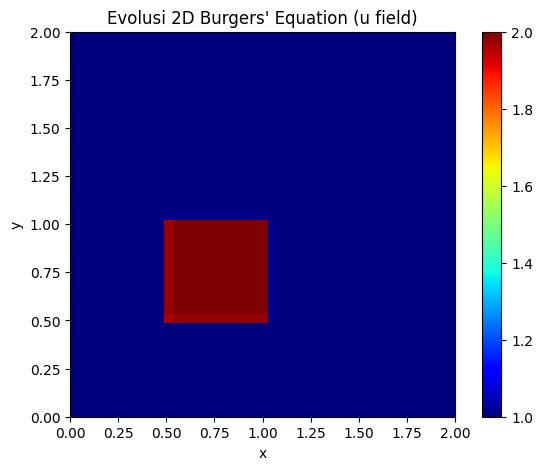

In [3]:
# Import libraries yang diperlukan
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# 1. Definisikan parameter simulasi
nx = 41          # Jumlah titik grid dalam x
ny = 41          # Jumlah titik grid dalam y
nt = 100         # Jumlah langkah waktu
nu = 0.01        # Koefisien viskositas
dx = 2 / (nx - 1) # Spasi grid di x
dy = 2 / (ny - 1) # Spasi grid di y
sigma = 0.0009    # Bilangan Courant untuk kestabilan
dt = sigma * dx * dy / nu  # Langkah waktu dari kondisi kestabilan

# 2. Inisialisasi array u dan v
u = np.ones((ny, nx))  # Kecepatan arah x
v = np.ones((ny, nx))  # Kecepatan arah y

# 3. Kondisi awal: Gelombang persegi di tengah domain
u[int(0.5 / dy):int(1 / dy + 1), int(0.5 / dx):int(1 / dx + 1)] = 2
v[int(0.5 / dy):int(1 / dy + 1), int(0.5 / dx):int(1 / dx + 1)] = 2

# 4. Siapkan salinan array untuk update
un = np.ones((ny, nx))
vn = np.ones((ny, nx))

# 5. Setup figure untuk animasi
fig, ax = plt.subplots(figsize=(7,5))
cax = ax.imshow(u, extent=[0,2,0,2], cmap='jet', origin='lower', animated=True)
fig.colorbar(cax)

# 6. Fungsi untuk memperbaharui grafik setiap frame animasi
def animate(n):
    global u, v, un, vn
    un = u.copy()
    vn = v.copy()
    
    u[1:-1,1:-1] = (un[1:-1,1:-1] 
                    - un[1:-1,1:-1] * dt / dx * (un[1:-1,1:-1] - un[1:-1,0:-2])
                    - vn[1:-1,1:-1] * dt / dy * (un[1:-1,1:-1] - un[0:-2,1:-1])
                    + nu * dt / dx**2 * (un[1:-1,2:] - 2 * un[1:-1,1:-1] + un[1:-1,0:-2])
                    + nu * dt / dy**2 * (un[2:,1:-1] - 2 * un[1:-1,1:-1] + un[0:-2,1:-1]))

    v[1:-1,1:-1] = (vn[1:-1,1:-1]
                    - un[1:-1,1:-1] * dt / dx * (vn[1:-1,1:-1] - vn[1:-1,0:-2])
                    - vn[1:-1,1:-1] * dt / dy * (vn[1:-1,1:-1] - vn[0:-2,1:-1])
                    + nu * dt / dx**2 * (vn[1:-1,2:] - 2 * vn[1:-1,1:-1] + vn[1:-1,0:-2])
                    + nu * dt / dy**2 * (vn[2:,1:-1] - 2 * vn[1:-1,1:-1] + vn[0:-2,1:-1]))

    # Update plot
    cax.set_array(u)
    return [cax]

# 7. Buat animasi
ani = animation.FuncAnimation(fig, animate, frames=nt, interval=50, blit=True)

# 8. Tampilkan
plt.title('Evolusi 2D Burgers\' Equation (u field)')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter  # Tambahkan import untuk menyimpan animasi sebagai GIF

# 1. Parameter umum
L = 10.0                      # Panjang domain
nx = 256                      # Jumlah grid points
x = np.linspace(-L/2, L/2, nx)  # Grid x
dx = x[1] - x[0]              # Jarak antar grid
dt = 0.01                     # Waktu infinitesimal
max_time = 5.0                # Waktu maksimum simulasi
nt = int(max_time / dt)       # Jumlah langkah waktu
nus = [1.0, 0.1, 0.01]        # Variasi viskositas

# 2. Kondisi awal Gaussian
def gaussian_initial_condition(x):
    return np.exp(-x**2 / 2)

# 3. Skema Finite Difference untuk persamaan Burgers
def solve_burgers_fd(u, nu, dt, dx, nt):
    nx = len(u)
    solutions = [u.copy()]
    for _ in range(nt):
        u_old = u.copy()
        for i in range(nx):
            # Indeks dengan kondisi batas periodik
            i_minus_1 = (i - 1) % nx
            i_plus_1 = (i + 1) % nx

            # Skema Finite Difference
            convection = -u_old[i] * (u_old[i] - u_old[i_minus_1]) / dx
            diffusion = nu * (u_old[i_plus_1] - 2 * u_old[i] + u_old[i_minus_1]) / dx**2
            u[i] = u_old[i] + dt * (convection + diffusion)

        solutions.append(u.copy())
    return np.array(solutions).T

# 4. Membuat animasi
def animate(i, all_solutions, lines, time_text):
    for line, solutions in zip(lines, all_solutions):
        line.set_ydata(solutions[:, i])  # Update solusi untuk setiap nilai nu
    time_text.set_text(f'Time: {i * dt:.2f} s')  # Update anotasi waktu
    return lines + [time_text]

if __name__ == "__main__":
    # Simpan semua solusi untuk variasi nu
    all_solutions = []
    for nu in nus:
        u_initial = gaussian_initial_condition(x)
        solutions = solve_burgers_fd(u_initial, nu, dt, dx, nt)
        all_solutions.append(solutions)

    # Setup animasi
    fig, ax = plt.subplots(figsize=(8, 6))
    colors = ['red', 'green', 'blue']
    labels = [f'ν = {nu}' for nu in nus]
    lines = []

    for color, label in zip(colors, labels):
        line, = ax.plot(x, all_solutions[0][:, 0], color=color, label=label)  # Inisialisasi garis
        lines.append(line)

    ax.set_xlim(-L/2, L/2)
    ax.set_ylim(-0.5, 1.5)  # Disesuaikan untuk semua solusi
    ax.set_xlabel('x')
    ax.set_ylabel('u(x,t)')
    ax.set_title('Persamaan Burgers Metode FD dengan Variasi ν (Intial Gaussian)')
    ax.legend()
    time_text = ax.text(0.02, 0.95, '', transform=ax.transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

    ani = FuncAnimation(fig, animate, fargs=(all_solutions, lines, time_text), frames=nt, interval=50, blit=True)

    # Simpan animasi sebagai GIF
    ani.save('Burgers_FD_Variasi_nu.gif', writer=PillowWriter(fps=20))
    plt.show()


C:\Users\fadhi\AppData\Local\Temp\ipykernel_14300\2011079049.py:31: RuntimeWarning: overflow encountered in scalar multiply
  convection = -u_old[i] * (u_old[i] - u_old[i_minus_1]) / dx
C:\Users\fadhi\AppData\Local\Temp\ipykernel_14300\2011079049.py:31: RuntimeWarning: invalid value encountered in scalar subtract
  convection = -u_old[i] * (u_old[i] - u_old[i_minus_1]) / dx
C:\Users\fadhi\AppData\Local\Temp\ipykernel_14300\2011079049.py:32: RuntimeWarning: invalid value encountered in scalar subtract
  diffusion = nu * (u_old[i_plus_1] - 2 * u_old[i] + u_old[i_minus_1]) / dx**2
C:\Users\fadhi\AppData\Local\Temp\ipykernel_14300\2011079049.py:32: RuntimeWarning: invalid value encountered in scalar add
  diffusion = nu * (u_old[i_plus_1] - 2 * u_old[i] + u_old[i_minus_1]) / dx**2
C:\Users\fadhi\AppData\Local\Temp\ipykernel_14300\2011079049.py:33: RuntimeWarning: invalid value encountered in scalar add
  u[i] = u_old[i] + dt * (convection + diffusion)
C:\Users\fadhi\AppData\Local\Temp\ipyk

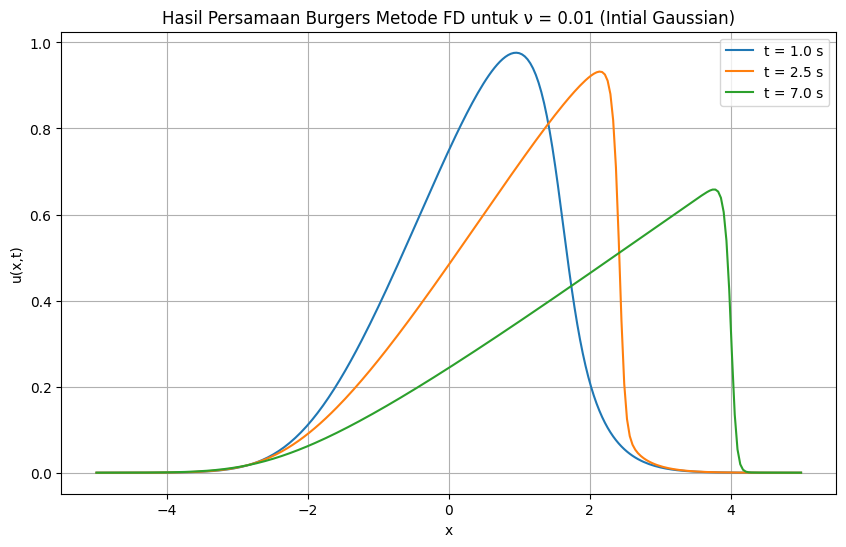

In [ ]:
# Menampilkan hasil untuk \nu = 0.01 pada t = 1.0, 2.5, dan 4.0 detik
import numpy as np
import matplotlib.pyplot as plt

# Parameter umum
L = 10.0                      # Panjang domain
nx = 256                      # Jumlah grid points
x = np.linspace(-L/2, L/2, nx)  # Grid x
dx = x[1] - x[0]              # Jarak antar grid
dt = 0.01                     # Waktu infinitesimal
max_time = 7.0                # Waktu maksimum simulasi
nt = int(max_time / dt)       # Jumlah langkah waktu
nu = 0.01                     # Viskositas

# Kondisi awal Gaussian
def gaussian_initial_condition(x):
    return np.exp(-x**2 / 2)

# Skema Finite Difference untuk persamaan Burgers
def solve_burgers_fd(u, nu, dt, dx, nt):
    nx = len(u)
    solutions = [u.copy()]
    for _ in range(nt):
        u_old = u.copy()
        for i in range(nx):
            # Indeks dengan kondisi batas periodik
            i_minus_1 = (i - 1) % nx
            i_plus_1 = (i + 1) % nx

            # Skema Finite Difference
            convection = -u_old[i] * (u_old[i] - u_old[i_minus_1]) / dx
            diffusion = nu * (u_old[i_plus_1] - 2 * u_old[i] + u_old[i_minus_1]) / dx**2
            u[i] = u_old[i] + dt * (convection + diffusion)

        solutions.append(u.copy())
    return np.array(solutions).T

# Simulasi untuk \nu = 0.01
u_initial = gaussian_initial_condition(x)
solutions = solve_burgers_fd(u_initial, nu, dt, dx, nt)

# Waktu yang akan ditampilkan
times_to_plot = [1.0, 2.5, 7.0]
indices_to_plot = [int(t / dt) for t in times_to_plot]

# Plot hasil
plt.figure(figsize=(10, 6))
for t, idx in zip(times_to_plot, indices_to_plot):
    plt.plot(x, solutions[:, idx], label=f't = {t} s')

plt.title('Hasil Persamaan Burgers Metode FD untuk ν = 0.01 (Intial Gaussian)')
plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.legend()
plt.grid()
plt.show()

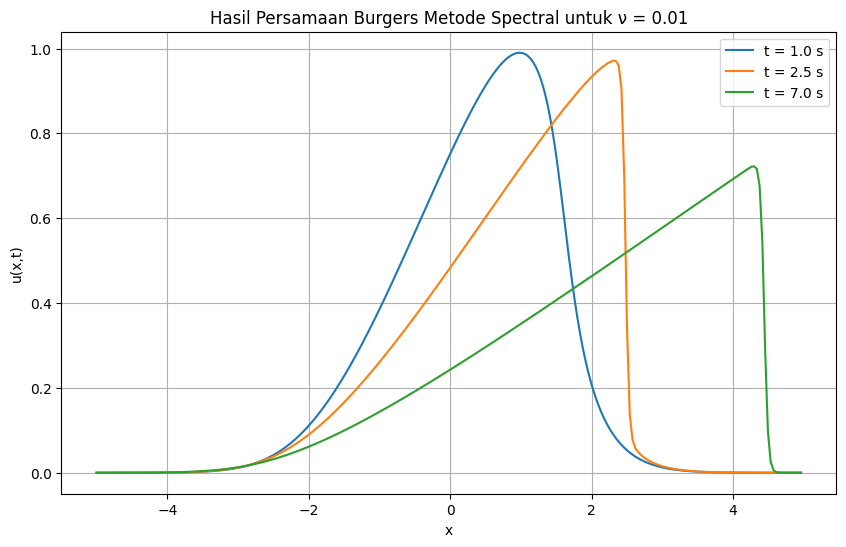

In [20]:
# Menampilkan hasil untuk \nu = 0.01 pada t = 1.0, 2.5, dan 4.0 detik menggunakan metode spectral
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Parameter ruang
L = 10.0
N = 256  # Gunakan jumlah grid yang lebih besar untuk metode spektral
x = np.linspace(-L/2, L/2, N, endpoint=False)
dx = x[1] - x[0]

# Parameter waktu
T = 8.0
dt = 0.01
num_steps = int(T / dt)
t = np.linspace(0, T, num_steps)

# Nilai viskositas
nu = 0.01  # menggunakan \nu = 0.01

# Kondisi awal Gaussian
def gaussian_initial_condition(x):
    return np.exp(-x**2 / 2)

# Sistem ODE untuk metode spektral
def burgers_spectral(u, t, k, nu):
    u_hat = np.fft.fft(u)
    u_hat_x = 1j * k * u_hat
    u_hat_xx = -k**2 * u_hat
    u_x = np.fft.ifft(u_hat_x)
    u_xx = np.fft.ifft(u_hat_xx)
    u_t = -u * u_x + nu * u_xx
    return u_t.real

# Diskritisasi bilangan gelombang
k = 2 * np.pi * np.fft.fftfreq(N, d=dx)

# Simulasi untuk \nu = 0.01
u_initial = gaussian_initial_condition(x)
solutions = odeint(burgers_spectral, u_initial, t, args=(k, nu)).T

# Waktu yang akan ditampilkan
times_to_plot = [1.0, 2.5, 7.0]
indices_to_plot = [int(time / dt) for time in times_to_plot]

# Plot hasil
plt.figure(figsize=(10, 6))
for time, idx in zip(times_to_plot, indices_to_plot):
    plt.plot(x, solutions[:, idx], label=f't = {time} s')

plt.title('Hasil Persamaan Burgers Metode Spectral untuk ν = 0.01')
plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.legend()
plt.grid()
plt.show()

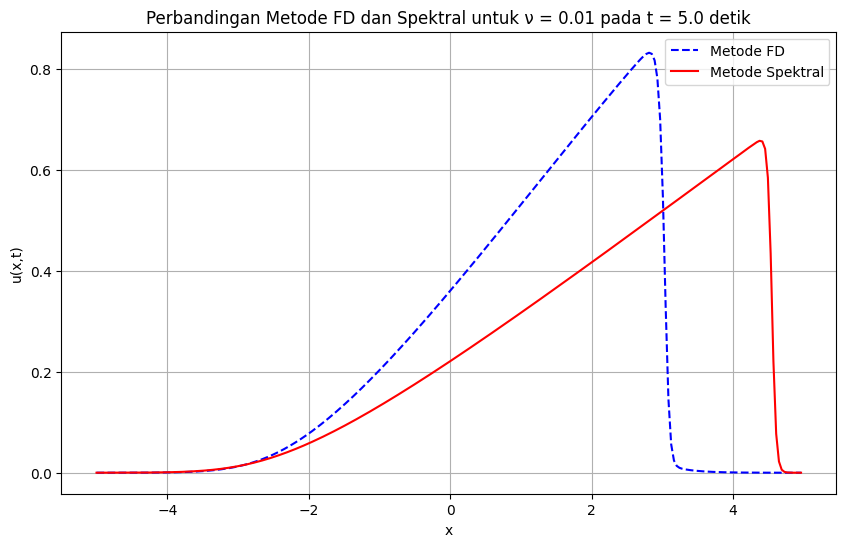

In [ ]:
# Perbandingan metode FD dan spektral untuk \nu = 0.01 pada t = 5.0 detik (initial Gaussian wave)
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Parameter umum
L = 10.0                      # Panjang domain
nx = 256                      # Jumlah grid points
x = np.linspace(-L/2, L/2, nx, endpoint=False)  # Grid x
dx = x[1] - x[0]              # Jarak antar grid
dt = 0.01                     # Waktu infinitesimal
t_final = 4.0                 # Waktu akhir
nt = int(t_final / dt)        # Jumlah langkah waktu
nu = 0.01                     # Viskositas

# Kondisi awal Gaussian
def gaussian_initial_condition(x):
    return np.exp(-x**2 / 2)

# Skema Finite Difference untuk persamaan Burgers
def solve_burgers_fd(u, nu, dt, dx, nt):
    nx = len(u)
    solutions = [u.copy()]
    for _ in range(nt):
        u_old = u.copy()
        for i in range(nx):
            # Indeks dengan kondisi batas periodik
            i_minus_1 = (i - 1) % nx
            i_plus_1 = (i + 1) % nx

            # Skema Finite Difference
            convection = -u_old[i] * (u_old[i] - u_old[i_minus_1]) / dx
            diffusion = nu * (u_old[i_plus_1] - 2 * u_old[i] + u_old[i_minus_1]) / dx**2
            u[i] = u_old[i] + dt * (convection + diffusion)

        solutions.append(u.copy())
    return np.array(solutions).T

# Sistem ODE untuk metode spektral
def burgers_spectral(u, t, k, nu):
    u_hat = np.fft.fft(u)
    u_hat_x = 1j * k * u_hat
    u_hat_xx = -k**2 * u_hat
    u_x = np.fft.ifft(u_hat_x)
    u_xx = np.fft.ifft(u_hat_xx)
    u_t = -u * u_x + nu * u_xx
    return u_t.real

# Diskritisasi bilangan gelombang untuk metode spektral
k = 2 * np.pi * np.fft.fftfreq(nx, d=dx)

# Simulasi untuk metode FD
u_initial = gaussian_initial_condition(x)
fd_solutions = solve_burgers_fd(u_initial, nu, dt, dx, nt)
fd_solution_final = fd_solutions[:, -1]  # Solusi akhir metode FD

# Simulasi untuk metode spektral
t = np.linspace(0, t_final, nt)
spectral_solutions = odeint(burgers_spectral, u_initial, t, args=(k, nu)).T
spectral_solution_final = spectral_solutions[:, -1]  # Solusi akhir metode spektral

# Plot perbandingan
plt.figure(figsize=(10, 6))
plt.plot(x, fd_solution_final, label='Metode FD', linestyle='--', color='blue')
plt.plot(x, spectral_solution_final, label='Metode Spektral', linestyle='-', color='red')
plt.title('Perbandingan Metode FD dan Spektral untuk ν = 0.01 pada t = 5.0 detik')
plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.legend()
plt.grid()
plt.show()

In [23]:
# Perhitungan error untuk metode FD
import numpy as np

def calculate_errors(u_numeric, u_analytic):
    # pastikan u_numeric dan u_analytic adalah array NumPy
    u_numeric = np.array(u_numeric)
    u_analytic = np.array(u_analytic)

    # RMSE
    rmse = np.sqrt(np.mean((u_numeric - u_analytic)**2))

    # Max Error (L∞)
    max_error = np.max(np.abs(u_numeric - u_analytic))

    # Relative RMSE
    relative_rmse = rmse / np.sqrt(np.mean(u_analytic**2))

    return rmse, max_error, relative_rmse

# Solusi analitik untuk waktu akhir
u_analytic = np.exp(-x**2 / (4 * nu * t_final)) / np.sqrt(4 * np.pi * nu * t_final)

# Hitung error untuk metode FD
rmse_fd, max_err_fd, rel_rmse_fd = calculate_errors(fd_solution_final, u_analytic)
print(f"[FD] RMSE: {rmse_fd:.5e}, Max Error: {max_err_fd:.5e}, Rel RMSE: {rel_rmse_fd:.5%}")

[FD] RMSE: 3.96810e-01, Max Error: 1.05031e+00, Rel RMSE: 125.64845%


In [24]:
# Perhitungan error untuk metode spektral

# Hitung error untuk metode spektral
rmse_spectral, max_err_spectral, rel_rmse_spectral = calculate_errors(spectral_solution_final, u_analytic)
print(f"[Spectral] RMSE: {rmse_spectral:.5e}, Max Error: {max_err_spectral:.5e}, Rel RMSE: {rel_rmse_spectral:.5%}")

[Spectral] RMSE: 3.95875e-01, Max Error: 1.18965e+00, Rel RMSE: 125.35235%


In [1]:
# Evaluasi galat pada berbagai ukuran grid (dx) untuk metode FD dan Spektral
import numpy as np
import matplotlib.pyplot as plt

# Definisi ulang fungsi solve_burgers_fd untuk memastikan tersedia
def solve_burgers_fd(u, nu, dt, dx, nt):
    nx = len(u)
    solutions = [u.copy()]
    for _ in range(nt):
        u_old = u.copy()
        for i in range(nx):
            # Indeks dengan kondisi batas periodik
            i_minus_1 = (i - 1) % nx
            i_plus_1 = (i + 1) % nx

            # Skema Finite Difference
            convection = -u_old[i] * (u_old[i] - u_old[i_minus_1]) / dx
            diffusion = nu * (u_old[i_plus_1] - 2 * u_old[i] + u_old[i_minus_1]) / dx**2
            u[i] = u_old[i] + dt * (convection + diffusion)

        solutions.append(u.copy())
    return np.array(solutions).T

# Fungsi untuk menghitung solusi FD pada berbagai dx
def solve_fd_for_dx(dx_values, nu, t_final):
    rmse_fd_list = []
    for dx in dx_values:
        nx = int(10 / dx) + 1  # Panjang domain tetap 10
        x = np.linspace(-5, 5, nx)
        dt = 0.01  # Tetap
        nt = int(t_final / dt)
        u_initial = np.exp(-x**2 / 2)
        fd_solutions = solve_burgers_fd(u_initial, nu, dt, dx, nt)
        fd_solution_final = fd_solutions[:, -1]
        u_analytic = np.exp(-x**2 / (4 * nu * t_final)) / np.sqrt(4 * np.pi * nu * t_final)
        rmse_fd, _, _ = calculate_errors(fd_solution_final, u_analytic)
        rmse_fd_list.append(rmse_fd)
    return rmse_fd_list

# Fungsi untuk menghitung solusi Spektral pada berbagai dx
def solve_spectral_for_dx(dx_values, nu, t_final):
    rmse_spectral_list = []
    for dx in dx_values:
        nx = int(10 / dx) + 1  # Panjang domain tetap 10
        x = np.linspace(-5, 5, nx, endpoint=False)
        dt = 0.01  # Tetap
        nt = int(t_final / dt)
        k = 2 * np.pi * np.fft.fftfreq(nx, d=dx)
        u_initial = np.exp(-x**2 / 2)
        t = np.linspace(0, t_final, nt)
        spectral_solutions = odeint(burgers_spectral, u_initial, t, args=(k, nu)).T
        spectral_solution_final = spectral_solutions[:, -1]
        u_analytic = np.exp(-x**2 / (4 * nu * t_final)) / np.sqrt(4 * np.pi * nu * t_final)
        rmse_spectral, _, _ = calculate_errors(spectral_solution_final, u_analytic)
        rmse_spectral_list.append(rmse_spectral)
    return rmse_spectral_list

# Nilai dx yang akan diuji
dx_values = [0.2, 0.1, 0.05, 0.025]
nu = 0.01
t_final = 4.0

# Hitung RMSE untuk setiap dx
rmse_fd_list = solve_fd_for_dx(dx_values, nu, t_final)
rmse_spectral_list = solve_spectral_for_dx(dx_values, nu, t_final)

# Plot log-log RMSE terhadap dx
plt.figure(figsize=(8, 6))
plt.loglog(dx_values, rmse_fd_list, label='Metode FD', marker='o', linestyle='--')
plt.loglog(dx_values, rmse_spectral_list, label='Metode Spektral', marker='s', linestyle='-')
plt.xlabel('Ukuran Grid (Δx)')
plt.ylabel('RMSE')
plt.title('Konvergensi Metode FD dan Spektral pada Persamaan Burgers')
plt.legend()
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.show()

NameError: name 'calculate_errors' is not defined